# Lending club case study

### Importing required libraries

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

### Importing dataset

Import csv files of given data with encoding specified as "palmos"

In [3]:
loan = pd.read_csv("F:/AI ML/Lending Club Case study/loan/loan.csv",  encoding="palmos", low_memory=False)

In [4]:
loan.shape

(39717, 111)

In [5]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


### Data Cleaning

% missing values in dataset

In [6]:
data_missing = (round(100*(loan.isnull().sum(axis = 0)/loan.shape[0]), 2))
data_missing[data_missing > 0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

From above table, for some of column have 100% missing values so these columns will be removed

In [7]:
# total number of columns having more than 80% of missing values
colums_missing_30 = data_missing[data_missing >= 30]
colums_missing_30.shape

(58,)

In [8]:
# saving in a list for dropping the missing values
colums_missing_30 = list(colums_missing_30.index)

In [9]:
loan.drop(labels = colums_missing_30, axis = 1, inplace = True )

In [10]:
loan.shape

(39717, 53)

In [11]:
data_missing = (round(100*(loan.isnull().sum(axis = 0)/loan.shape[0]), 2))
data_missing[data_missing > 0]

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

In [12]:
data_missing_1 = list(data_missing[data_missing > 0].index)

As some minor % data is missing form 39717 rows and emol_title and empl_length is not affecting our analyis significanty, we can remove the missing values and make dataset clean.

In [13]:
loan = loan[~(loan[data_missing_1[0]].isnull())]
loan = loan[~(loan[data_missing_1[1]].isnull())]
loan = loan[~(loan[data_missing_1[2]].isnull())]
loan = loan[~(loan[data_missing_1[3]].isnull())]
loan = loan[~(loan[data_missing_1[4]].isnull())]
loan = loan[~(loan[data_missing_1[5]].isnull())]
loan = loan[~(loan[data_missing_1[6]].isnull())]
loan = loan[~(loan[data_missing_1[7]].isnull())]
loan = loan[~(loan[data_missing_1[8]].isnull())]
loan = loan[~(loan[data_missing_1[9]].isnull())]

In [14]:
data_missing = (round(100*(loan.isnull().sum(axis = 0)/loan.shape[0]), 2))
data_missing[data_missing > 0]
print("so now we have clean dataset to analysis further for business objective")

so now we have clean dataset to analysis further for business objective


checking the unique data present in categorical variables also variation in variables in dataset which will help in future while analysis.

In [15]:
# From initial eyeballing "pub_rec_bankruptcies" seems important variable but very few cases are avalable with it
loan.pub_rec_bankruptcies.value_counts()

0.0    34931
1.0     1493
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [16]:
# with zip code, its difficult to conclude anything as it is not correct 
loan.zip_code.value_counts()

100xx    540
945xx    508
112xx    480
606xx    477
070xx    440
        ... 
673xx      1
040xx      1
831xx      1
414xx      1
463xx      1
Name: zip_code, Length: 805, dtype: int64

In [17]:
# For all, policy code is 1 so its not meaningfull 
loan.policy_code.value_counts()

1    36431
Name: policy_code, dtype: int64

In [18]:
# as only two loan terms are present in dataset and it will not contribute much for analysis
loan.term.describe()

count          36431
unique             2
top        36 months
freq           26375
Name: term, dtype: object

In [19]:
#
loan.installment.value_counts()

311.11    65
311.02    53
180.96    52
150.80    43
368.45    43
          ..
584.32     1
336.53     1
863.42     1
615.09     1
595.76     1
Name: installment, Length: 14365, dtype: int64

In [20]:
# title of employee
loan.emp_title.describe()

count       36431
unique      28205
top       US Army
freq          131
Name: emp_title, dtype: object

In [21]:
# employee length in years
loan.emp_length.describe()

count         36431
unique           11
top       10+ years
freq           8407
Name: emp_length, dtype: object

In [22]:
loan.delinq_2yrs.value_counts()

0     32484
1      3028
2       628
3       197
4        55
5        21
6        10
7         4
8         2
11        1
9         1
Name: delinq_2yrs, dtype: int64

In [23]:
# total payment
loan.total_pymnt.describe()

count    36431.000000
mean     12311.226392
std       9048.552965
min         33.730000
25%       5672.634184
50%      10101.589360
75%      16700.865405
max      58563.679930
Name: total_pymnt, dtype: float64

In [24]:
# loan issue dates
loan.issue_d.value_counts()

Dec-11    2126
Nov-11    2048
Oct-11    1951
Sep-11    1925
Aug-11    1810
Jul-11    1732
Jun-11    1702
May-11    1575
Apr-11    1463
Mar-11    1339
Jan-11    1299
Feb-11    1186
Dec-10    1174
Nov-10    1064
Jul-10    1062
Oct-10    1046
Sep-10    1030
Aug-10    1030
Jun-10     965
May-10     870
Apr-10     786
Mar-10     678
Feb-10     575
Nov-09     534
Jan-10     515
Dec-09     513
Oct-09     506
Sep-09     437
Aug-09     398
Jul-09     361
Jun-09     341
May-09     307
Apr-09     278
Mar-09     267
Feb-09     253
Jan-09     228
Dec-08     214
Nov-08     175
Apr-08     145
Mar-08     112
Oct-08      93
Jul-08      77
May-08      69
Aug-08      66
Jun-08      61
Sep-08      29
Jan-08       6
Feb-08       6
Dec-07       2
Nov-07       1
Oct-07       1
Name: issue_d, dtype: int64

In [25]:
loan.inq_last_6mths.value_counts()

0    17729
1    10065
2     5362
3     2761
4      290
5      125
6       55
7       32
8       12
Name: inq_last_6mths, dtype: int64

#### from getting some information online on "Risk analytics" in loan business and examining excel dataset, below variables are potentially usefull in deciding risky applicants.

In [26]:
## creating the loan_final dataframe form loan

loan_final = loan.loc[:,['loan_amnt','int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'inq_last_6mths', 'purpose',
        'dti', "delinq_2yrs", "pub_rec", "term"]]

Updating the current datatypes in "loan_final" dataframe for numerical and categorical variable

In [27]:
loan_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36431 entries, 1 to 39623
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            36431 non-null  int64  
 1   int_rate             36431 non-null  object 
 2   installment          36431 non-null  float64
 3   grade                36431 non-null  object 
 4   sub_grade            36431 non-null  object 
 5   emp_title            36431 non-null  object 
 6   emp_length           36431 non-null  object 
 7   home_ownership       36431 non-null  object 
 8   annual_inc           36431 non-null  float64
 9   verification_status  36431 non-null  object 
 10  issue_d              36431 non-null  object 
 11  loan_status          36431 non-null  object 
 12  inq_last_6mths       36431 non-null  int64  
 13  purpose              36431 non-null  object 
 14  dti                  36431 non-null  float64
 15  delinq_2yrs          36431 non-null 

In [28]:
## Updating the "int_rate" type in dataset by removing % 
loan_final.loc[:, "int_rate"] = loan_final["int_rate"].apply(lambda x : float(x[: -1]))

In [29]:
#creating a new column employee length as numerical variable as per below table

#            years
#10+ years    10.5
#2 years      2.0
#< 1 year     0.5
#3 years      3.0
#4 years      4.0
#5 years      5.0
#1 year       1.0
#6 years      6.0
#7 years      7.0
#8 years      8.0
#9 years      9.0


In [30]:
def convert(x):
    switcher = {
        "10+ years" : 10.5,
        "9 years" : 9,
        "8 years" : 8,
        "7 years" :7,
        "6 years" :6,
        "5 years" :5,
        "4 years" :4,
        "3 years" :3,
        "2 years" :2,
        "1 years" :1,
        "< 1 year" : 0.5,
    }
    return switcher.get(x, 0)

loan_final.loc[:, "emp_length_num"] =  loan_final.loc[:, "emp_length"].apply(lambda x : convert(x)) 

In [31]:
# adding a count column in dataset so it can be used in calculating percentages
loan_final["count"] = 1

In [32]:
## Adding a column in dataset,to convert "Loan status" categorical variable in numerical type
loan_final["loan_status_num"] = loan_final.loan_status.apply(lambda x : 0 if x == "Charged Off" else 1)

In [33]:
## "Current" loan status in dataset
#"Current" loan status will not help in analysing as its not clear that they will charged off or full paid customers.
# so removing the "Current" in the dataset
loan_final = loan_final[~(loan_final.loan_status == "Current")]

In [34]:
loan_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35365 entries, 1 to 39623
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            35365 non-null  int64  
 1   int_rate             35365 non-null  float64
 2   installment          35365 non-null  float64
 3   grade                35365 non-null  object 
 4   sub_grade            35365 non-null  object 
 5   emp_title            35365 non-null  object 
 6   emp_length           35365 non-null  object 
 7   home_ownership       35365 non-null  object 
 8   annual_inc           35365 non-null  float64
 9   verification_status  35365 non-null  object 
 10  issue_d              35365 non-null  object 
 11  loan_status          35365 non-null  object 
 12  inq_last_6mths       35365 non-null  int64  
 13  purpose              35365 non-null  object 
 14  dti                  35365 non-null  float64
 15  delinq_2yrs          35365 non-null 

In [35]:
## saving final dataset reference and backup
loan_final.to_csv('loan_final.csv', encoding='palmos', index=False)

# Data Analysis

### Univariate analysis for categorical variables

In [36]:
## Total %number of loan paid and charged off in given dataset
total_perc_status = loan_final.groupby("loan_status")["count"].sum()
total_perc_status

loan_status
Charged Off     4942
Fully Paid     30423
Name: count, dtype: int64

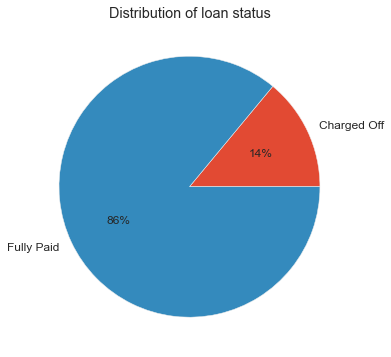

In [37]:
plt.style.use("ggplot")
plt.figure(figsize = (6, 6))
plt.pie(total_perc_status,labels = ["Charged Off", "Fully Paid"], autopct='%1.0f%%', textprops={'fontsize': 12})
plt.title("Distribution of loan status")
plt.show()

In [38]:
## Adding column with assigning boolean values for "Fully Paid" = True and "Charged off" = False
loan_final["loan_status_bool"] = loan_final.loan_status == "Charged Off"

In [39]:
## Understanding the %charged off for "grade" column

#create a groubby dataframe for gb_grade
gb_grade = loan_final.groupby("grade")
# create two dataset for calculating %
Charged_off_count = gb_grade["loan_status_bool"].sum()
total_count = gb_grade["count"].sum()
grade = pd.merge(Charged_off_count, total_count, how='inner', on='grade')
grade["% Charged off"] = (grade["loan_status_bool"] / grade["count"]) * 100
grade.reset_index(inplace=True)
grade

,grade,loan_status_bool,count,% Charged off
0,A,513,9140,5.612691
1,B,1253,10718,11.690614
2,C,1169,7180,16.281337
3,D,980,4662,21.021021
4,E,648,2481,26.118501
5,F,286,902,31.707317
6,G,93,282,32.978723


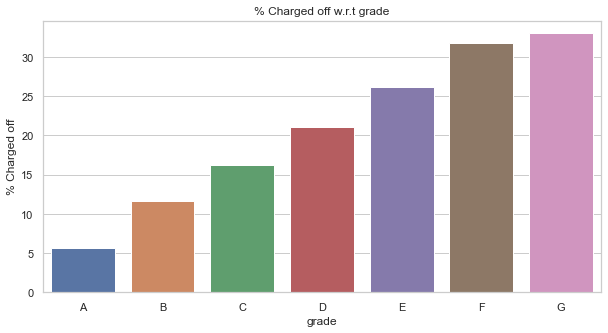

In [40]:
sns.set(style="whitegrid")
plt.figure(figsize = (10, 5))
sns.barplot(data = grade, x = "grade", y = "% Charged off")
plt.title("% Charged off w.r.t grade")
plt.show()

Observation: different grade shows relationship between %charged off loans as grade increases %charge off is increasing

In [41]:
## Understanding the %charged off for "sub grade" column

#create a groubby dataframe for gb_subgrade
gb_subgrade = loan_final.groupby("sub_grade")
# create two dataset for calculating %
Charged_off_count = gb_subgrade["loan_status_bool"].sum()
total_count = gb_subgrade["count"].sum()
subgrade = pd.merge(Charged_off_count, total_count, how='inner', on='sub_grade')
subgrade["% Charged off"] = (subgrade["loan_status_bool"] / subgrade["count"]) * 100
subgrade.reset_index(inplace=True)
subgrade

,sub_grade,loan_status_bool,count,% Charged off
0,A1,23,1005,2.288557
1,A2,63,1356,4.646018
2,A3,80,1630,4.907975
3,A4,158,2662,5.935387
4,A5,189,2487,7.599517
5,B1,141,1613,8.741476
6,B2,191,1825,10.465753
7,B3,307,2589,11.857860
8,B4,283,2247,12.594571
9,B5,331,2444,13.543372


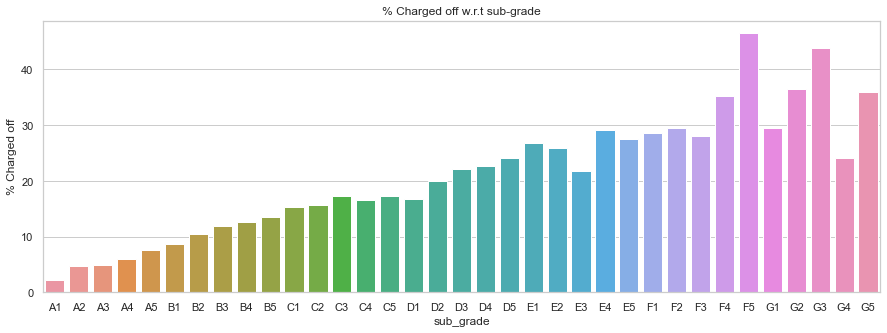

In [42]:
sns.set(style="whitegrid")
plt.figure(figsize = (15, 5))
sns.barplot(data = subgrade, x = "sub_grade", y = "% Charged off")
plt.title("% Charged off w.r.t sub-grade")
plt.show()

Observation: different sub_grade shows relationship between %charged off loans

### As its repetative task to check each varibales graph, preparing a general function to work on

In [43]:
def univarate_analysis(x):
    variable = str(x)
    gb_dataset = loan_final.groupby(str(variable))
    
    # create two dataset for calculating %
    Charged_off_count = gb_dataset["loan_status_bool"].sum()
    total_count = gb_dataset["count"].sum()
    dataframe = pd.merge(Charged_off_count, total_count, how = 'inner', on = str(variable))
    dataframe["% Charged off"] = (dataframe["loan_status_bool"] / dataframe["count"]) * 100
    dataframe.reset_index(inplace=True)
    
    # visualization 
    sns.set(style="whitegrid")
    plt.figure(figsize = (10, 5))
    sns.barplot(data = dataframe, x = str(variable),  y = "% Charged off")
    plt.title("% Charged off w.r.t" + " " + str(variable))
    plt.show()
    
    return 


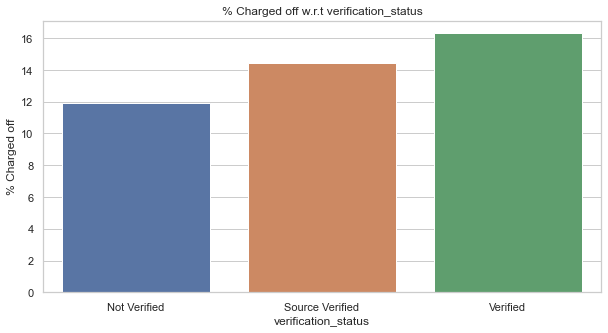

In [44]:
## Understanding the %charged off for "employee_length" column

univarate_analysis("verification_status")

Observation: Verification status is not strongly agree with the % charge off 

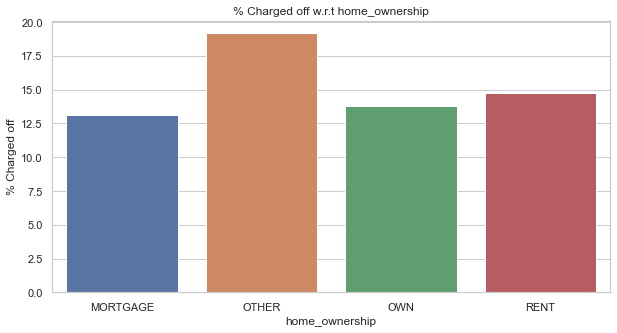

In [45]:
## Understanding the %charged off for "employee_length" column

univarate_analysis("home_ownership")

Observation: Home ownership status is not strongly agree with the % charge off 

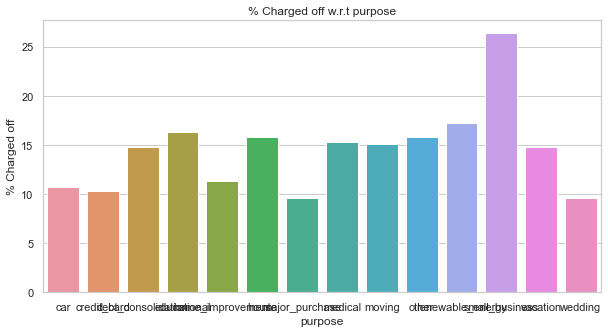

In [46]:
## Understanding the %charged off for "employee_length" column
## changing the figsize for this to 20 in the fuction.
univarate_analysis("purpose")


Observation: purpose have not strong relationship for % charge off

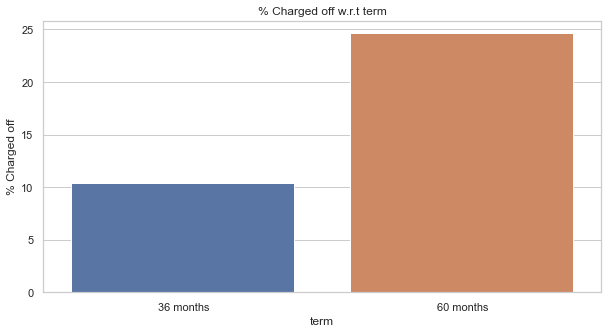

In [47]:
## Understanding the %charged off for "employee_length" column

univarate_analysis("term")

Observation: Term having strong relationship for % charge off

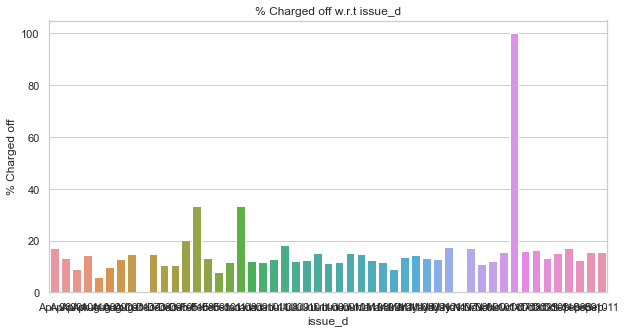

In [48]:
univarate_analysis("issue_d")

Observation: issue_d have not strong relationship for % charge off

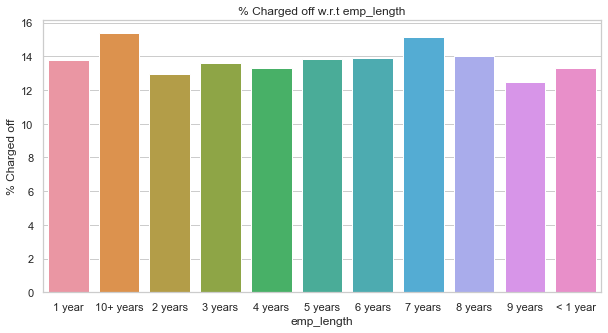

In [49]:
univarate_analysis("emp_length")

Observation: issue_d have not strong relationship for % charge off

### Univariate analysis for numerical variables

In [50]:
# loan ammount
loan_final.loan_amnt.describe()

count    35365.000000
mean     11133.179697
std       7326.276639
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:ylabel='Frequency'>

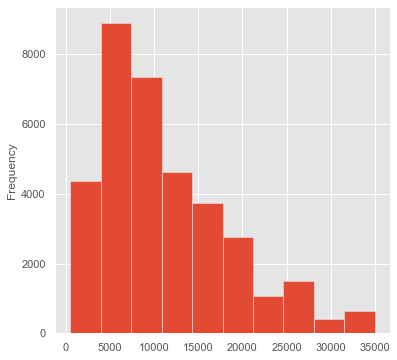

In [51]:
# loan ammount
plt.style.use("ggplot")
plt.figure(figsize = (6, 6))
loan_final.loan_amnt.plot.hist(bins = 10)

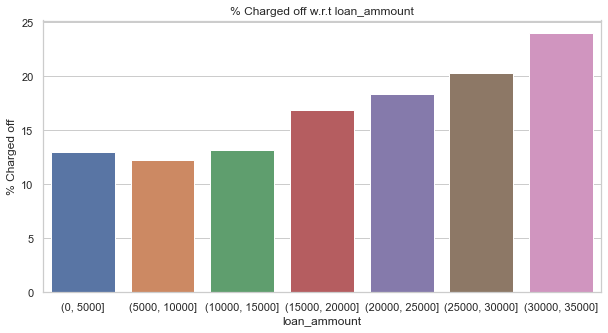

In [52]:
## creating a new columns after binning the loan ammount.
loan_final['loan_ammount'] = pd.cut(x=loan_final['loan_amnt'], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000])
univarate_analysis("loan_ammount")

Observation: higher loan ammount having high % charge off so there is relation for loan_amt with % charge off

In [53]:
## checking "int_rate" variable to decide bin size

loan_final.int_rate.describe()

count    35365.000000
mean        11.983494
std          3.702615
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

<AxesSubplot:ylabel='Frequency'>

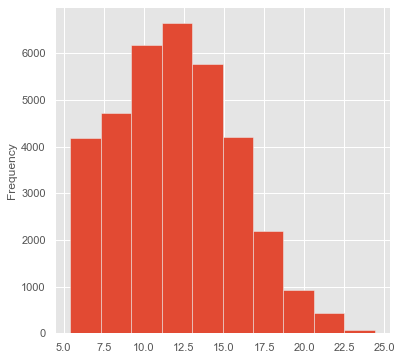

In [54]:
# loan ammount
plt.style.use("ggplot")
plt.figure(figsize = (6, 6))
loan_final.int_rate.plot.hist(bins = 10)

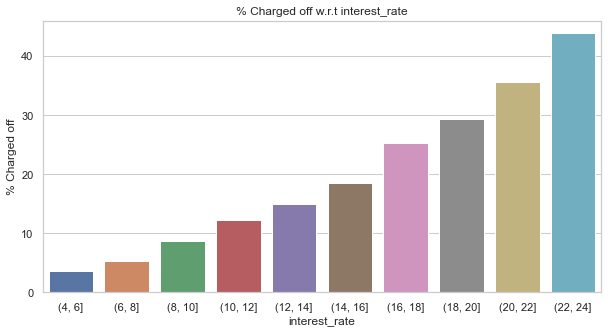

In [55]:
## creating a new columns after binning the loan ammount.
loan_final['interest_rate'] = pd.cut(x=loan_final['int_rate'], bins=list(range(4, 26, 2)))
univarate_analysis("interest_rate")

Observation: Strong relation for intrest_rate with % charge off

In [56]:
## checking "installment" variable to decide bin size

loan_final.installment.describe()

count    35365.000000
mean       324.045146
std        207.149207
min         16.080000
25%        167.840000
50%        280.620000
75%        426.560000
max       1305.190000
Name: installment, dtype: float64

<AxesSubplot:ylabel='Frequency'>

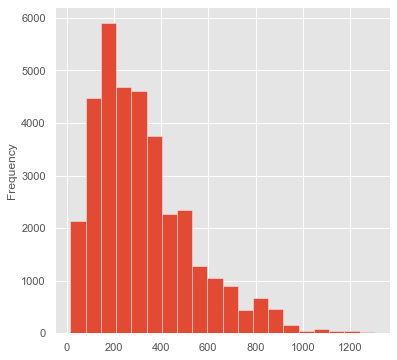

In [57]:
# installment ammount
plt.style.use("ggplot")
plt.figure(figsize = (6, 6))
loan_final.installment.plot.hist(bins = 20)

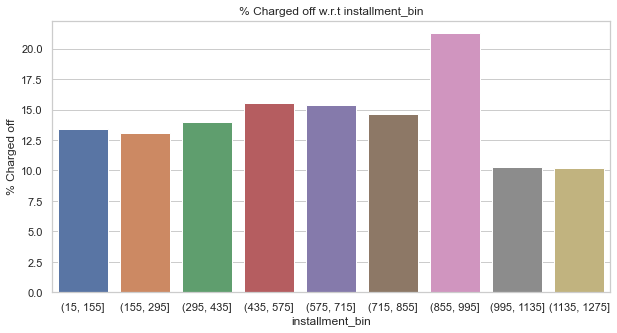

In [58]:
## creating a new columns after binning the installment ammount.
loan_final['installment_bin'] = pd.cut(x=loan_final['installment'], bins=list(range(15, 1400, 140)))
univarate_analysis("installment_bin")

Observation: No relation for installment with % charge off

In [59]:
# annual income
# as max ammount is 6E+06, seems not correct to represent for given dataset as mean and median of it is 6E+04
# so, considering 75% quantile value as maximum for the drwaing bar graph 
loan_final.annual_inc.describe()

count    3.536500e+04
mean     6.909774e+04
std      6.396843e+04
min      4.000000e+03
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

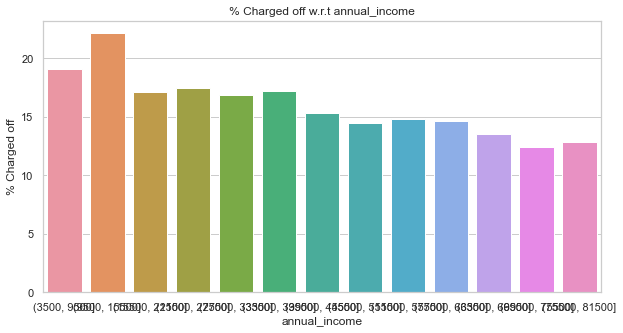

In [60]:
## checking "annual income" variable to decide bin size

loan_final.annual_inc.describe()

## creating a new columns after binning the installment ammount.
loan_final['annual_income'] = pd.cut(x=loan_final['annual_inc'], bins=list(range(3500, 85000, 6000)))
univarate_analysis("annual_income")

Observation: Annual income is not having strong relationship with %charge off, there is a trend between income with %anual income

In [61]:
# inq_last_6mths
## checking "inq_last_6mths" variable to decide bin size
loan_final.inq_last_6mths.describe()

count    35365.000000
mean         0.866902
std          1.064386
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64

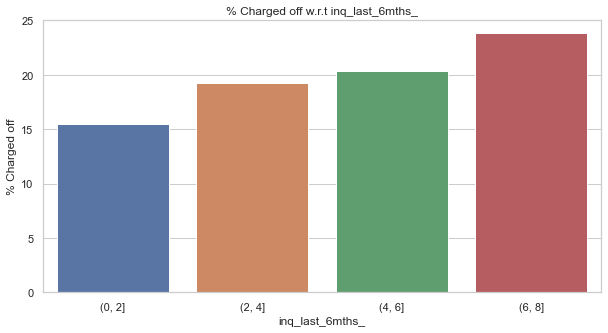

In [62]:

## creating a new column after binning the inq_last_6mths.
loan_final['inq_last_6mths_'] = pd.cut(x=loan_final['inq_last_6mths'], bins=list(range(0, 9, 2)))
univarate_analysis("inq_last_6mths_")

Observation: inq_last_6mths_ is having relationship with %charge off, there is a trend between inq_last_6mths_with %charge off

In [63]:
# dti
## checking "dti" variable to decide bin size
loan_final.dti.describe()

count    35365.000000
mean        13.404126
std          6.636652
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

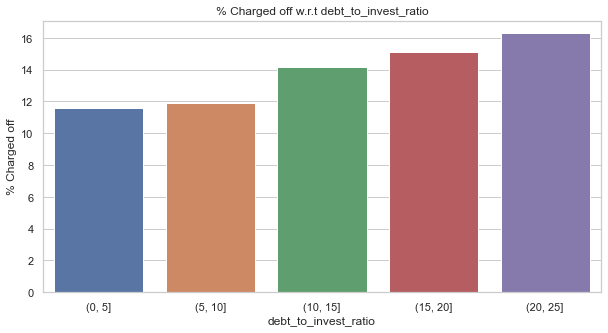

In [64]:
## creating a new column after binning the "dti".
loan_final['debt_to_invest_ratio'] = pd.cut(x=loan_final['dti'], bins=list(range(0, 30, 5)))
univarate_analysis("debt_to_invest_ratio")

Observation: dti is having relationship with %charge off, there is a trend between dti %charge off

#### Summary for univariate analysis

From the univariate analysis, below variables are found to be important for risk assesment. <br />
[ loan_amnt, int_rate, grade, sub_grade, annual_inc, inq_last_6mths, dti ]

In [65]:
loan_final

,loan_amnt,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,emp_length_num,count,loan_status_num,loan_status_bool,loan_ammount,interest_rate,installment_bin,annual_income,inq_last_6mths_,debt_to_invest_ratio
1,2500,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,...,0.5,1,0,True,"(0, 5000]","(14, 16]","(15, 155]","(27500.0, 33500.0]","(4.0, 6.0]","(0, 5]"
3,10000,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,...,10.5,1,1,False,"(5000, 10000]","(12, 14]","(295, 435]","(45500.0, 51500.0]","(0.0, 2.0]","(15, 20]"
5,5000,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,...,3.0,1,1,False,"(0, 5000]","(6, 8]","(155, 295]","(33500.0, 39500.0]","(2.0, 4.0]","(10, 15]"
6,7000,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,...,8.0,1,1,False,"(5000, 10000]","(14, 16]","(155, 295]","(45500.0, 51500.0]","(0.0, 2.0]","(20, 25]"
7,3000,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.00,Source Verified,...,9.0,1,1,False,"(0, 5000]","(18, 20]","(15, 155]","(45500.0, 51500.0]","(0.0, 2.0]","(5, 10]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39433,7500,9.83,241.41,B,B3,UCLA Medical Center,7 years,RENT,96000.00,Not Verified,...,7.0,1,1,False,"(5000, 10000]","(8, 10]","(155, 295]",NaN,NaN,"(0, 5]"
39475,12000,9.01,381.66,B,B2,Bank of America Corp.,6 years,MORTGAGE,100671.39,Not Verified,...,6.0,1,1,False,"(10000, 15000]","(8, 10]","(295, 435]",NaN,NaN,"(5, 10]"
39551,12375,10.91,404.62,C,C3,Fullmoon Software,2 years,RENT,80000.00,Not Verified,...,2.0,1,1,False,"(10000, 15000]","(10, 12]","(295, 435]","(75500.0, 81500.0]",NaN,"(5, 10]"
39562,4800,10.28,155.52,C,C1,E.E. Wine Inc,1 year,RENT,35000.00,Not Verified,...,0.0,1,1,False,"(0, 5000]","(10, 12]","(155, 295]","(33500.0, 39500.0]",NaN,"(5, 10]"


In [70]:
c=pd.DataFrame(loan_final.groupby(['loan_ammount','interest_rate'])['loan_status'].agg(count='count').reset_index())

c

,loan_ammount,interest_rate,count
0,"(0, 5000]","(4, 6]",425
1,"(0, 5000]","(6, 8]",1815
2,"(0, 5000]","(8, 10]",955
3,"(0, 5000]","(10, 12]",1820
4,"(0, 5000]","(12, 14]",1649
...,...,...,...
65,"(30000, 35000]","(14, 16]",74
66,"(30000, 35000]","(16, 18]",119
67,"(30000, 35000]","(18, 20]",117
68,"(30000, 35000]","(20, 22]",79


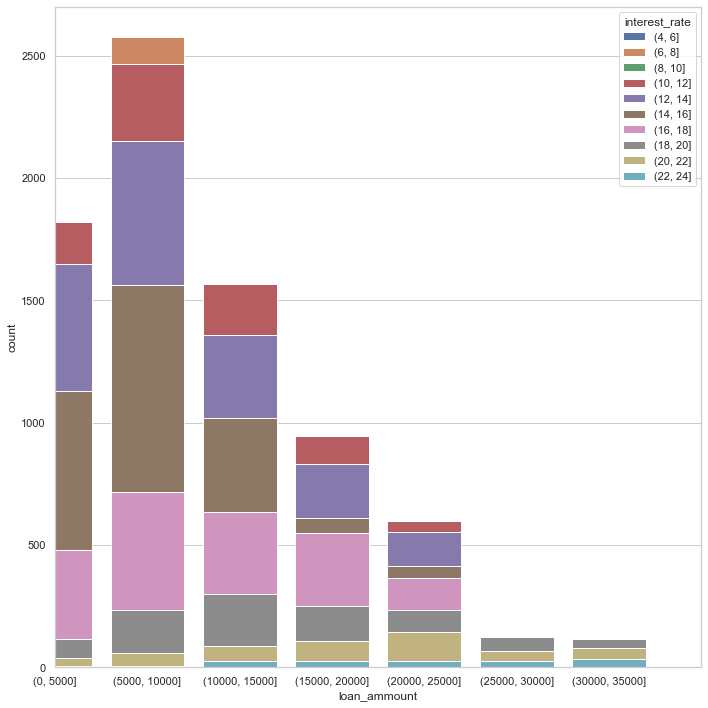

In [86]:
plt.figure(figsize = (10,10))
sns.barplot(data=c,x=c['loan_ammount'],y=c['count'],hue='interest_rate',dodge=False)
plt.ylim(0,2700) #Adjust the limits of the y-axis
plt.xlim(0,7) #Adjust the limits of the x-axis

plt.tight_layout()

In [72]:
d=pd.DataFrame(loan_final.groupby(['annual_income','interest_rate'])['loan_status'].agg(count='count').reset_index())

d

,annual_income,interest_rate,count
0,"(3500, 9500]","(4, 6]",0
1,"(3500, 9500]","(6, 8]",5
2,"(3500, 9500]","(8, 10]",5
3,"(3500, 9500]","(10, 12]",2
4,"(3500, 9500]","(12, 14]",4
...,...,...,...
125,"(75500, 81500]","(14, 16]",201
126,"(75500, 81500]","(16, 18]",136
127,"(75500, 81500]","(18, 20]",73
128,"(75500, 81500]","(20, 22]",28


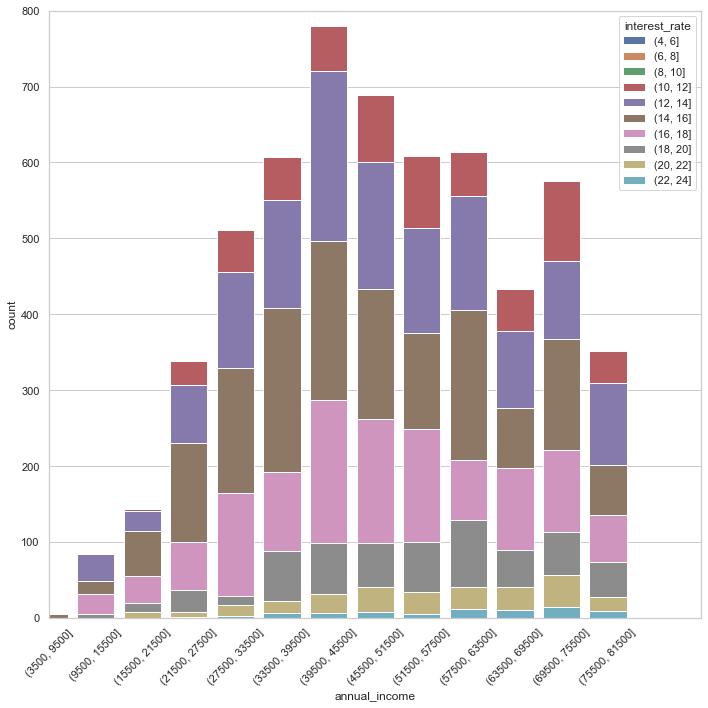

In [96]:
plt.figure(figsize = (10,10))
sns.barplot(data=d,x=d['annual_income'],y=d['count'],hue='interest_rate',dodge=False)
plt.ylim(0,800) #Adjust the limits of the y-axis
plt.xlim(0,14) #Adjust the limits of the x-axis
plt.xticks(rotation=45)

plt.tight_layout()

In [87]:
e=pd.DataFrame(loan_final.groupby(['annual_income','debt_to_invest_ratio'])['loan_status'].agg(count='count').reset_index())

e

,annual_income,debt_to_invest_ratio,count
0,"(3500, 9500]","(0, 5]",3
1,"(3500, 9500]","(5, 10]",6
2,"(3500, 9500]","(10, 15]",5
3,"(3500, 9500]","(15, 20]",4
4,"(3500, 9500]","(20, 25]",2
...,...,...,...
60,"(75500, 81500]","(0, 5]",186
61,"(75500, 81500]","(5, 10]",344
62,"(75500, 81500]","(10, 15]",430
63,"(75500, 81500]","(15, 20]",370


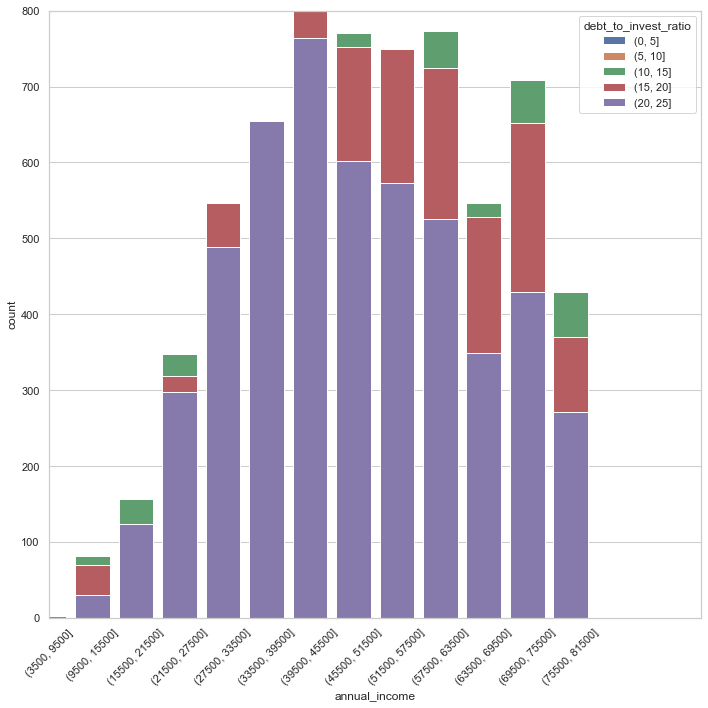

In [97]:
plt.figure(figsize = (10,10))
sns.barplot(data=e,x=e['annual_income'],y=e['count'],hue='debt_to_invest_ratio',dodge=False)
plt.ylim(0,800) #Adjust the limits of the y-axis
plt.xlim(0,15) #Adjust the limits of the x-axis
plt.xticks(rotation=45)

plt.tight_layout()

In [99]:
f=pd.DataFrame(loan_final.groupby(['grade','debt_to_invest_ratio'])['loan_status'].agg(count='count').reset_index())

f

,grade,debt_to_invest_ratio,count
0,A,"(0, 5]",1553
1,A,"(5, 10]",2181
2,A,"(10, 15]",2222
3,A,"(15, 20]",1704
4,A,"(20, 25]",1129
5,B,"(0, 5]",1247
6,B,"(5, 10]",2134
7,B,"(10, 15]",2695
8,B,"(15, 20]",2564
9,B,"(20, 25]",1869


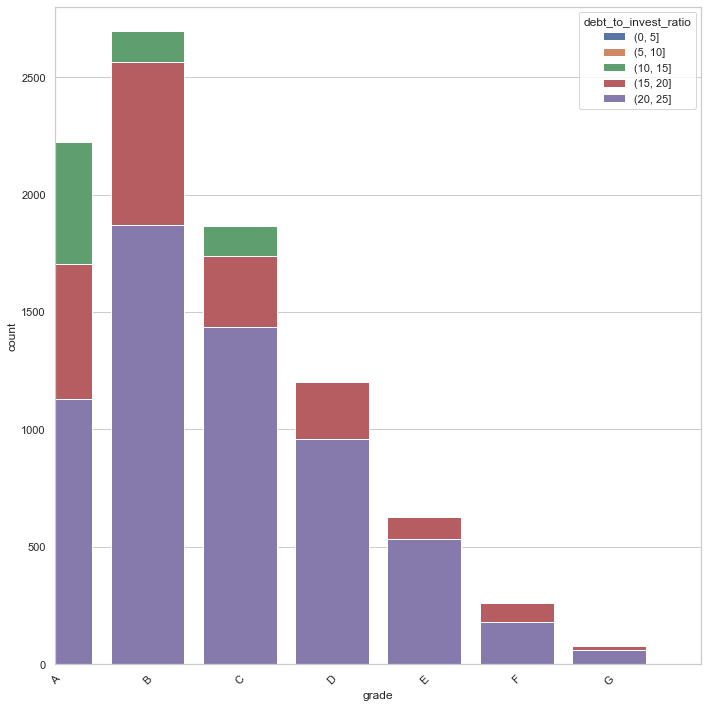

In [107]:
plt.figure(figsize = (10,10))
sns.barplot(data=f,x=f['grade'],y=f['count'],hue='debt_to_invest_ratio',dodge=False)
plt.ylim(0,2800) #Adjust the limits of the y-axis
plt.xlim(0,7) #Adjust the limits of the x-axis
plt.xticks(rotation=45)

plt.tight_layout()